In [20]:
# Measure the distirbuiton

import json

result_5k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_5000.jsonl")]
result_278k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_278000.jsonl")]
result_557k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_557000.jsonl")]

# # sort each by x['sample_idx]
# result_5k_sorted = sorted(result_5k, key=lambda x: (x['eval_idx'], x['sample_idx']))
# result_278k_sorted = sorted(result_278k, key=lambda x: (x['eval_idx'], x['sample_idx']))
# result_557k_sorted = sorted(result_557k, key=lambda x: (x['eval_idx'], x['sample_idx']))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb92119d1f0>>
Traceback (most recent call last):
  File "/home/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
li_5k = [x for x in result_5k if 'validation' in x['task'] and 'c4' in x['metadata'][0]['label'].lower()]
li_278k = [x for x in result_278k if 'validation' in x['task'] and 'c4' in x['metadata'][0]['label'].lower()]
li_557k =  [x for x in result_557k if 'validation' in x['task'] and 'c4' in x['metadata'][0]['label'].lower()] 

In [ ]:
# # ## Measure the distirbuiton

# import json
# import jsonlines

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_5000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_5k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_278000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_278k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_557000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_557k_sorted)

In [ ]:
# now let's plot

li1 = [x['loss'] for x in li_5k]
li2 = [x['loss'] for x in li_278k]
li3 = [x['loss'] for x in li_557k]

In [ ]:
li_5k[0].keys()

dict_keys(['input_ids', 'metadata', 'loss', 'task'])

In [ ]:
len(li_5k)
# len(li_5k[0]['input_ids'][0])


1933

In [ ]:
labels = [x['metadata'][0]['label'] for x in li_5k]
set(labels)

{'v2-small-c4_100_domains-validation',
 'v2-small-c4_en-validation',
 'v2-small-mc4_en-validation',
 'v3-small-c4_en-validation'}

In [ ]:
from collections import defaultdict
result = defaultdict(int)
for x in li_5k:
    result[x['metadata'][0]['label']] += 1
    
result

defaultdict(int,
            {'v3-small-c4_en-validation': 498,
             'v2-small-c4_100_domains-validation': 453,
             'v2-small-mc4_en-validation': 484,
             'v2-small-c4_en-validation': 498})

In [ ]:
import statistics

# Calculate various statistics
mean = statistics.mean(li1)
median = statistics.median(li1)
variance = statistics.variance(li1)
stdev = statistics.stdev(li1)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

Mean: 3.198368502045566
Median: 3.237203359603882
Variance: 0.2490774143794652
Standard Deviation: 0.49907656164106245


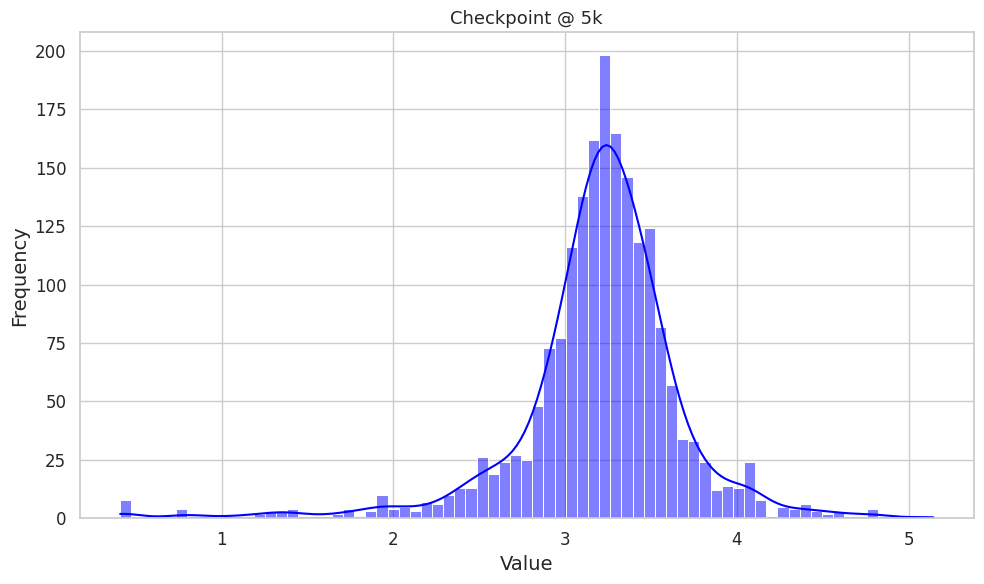

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li1, kde=True, color='blue')

# Add title and labels
plt.title('Checkpoint @ 5k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

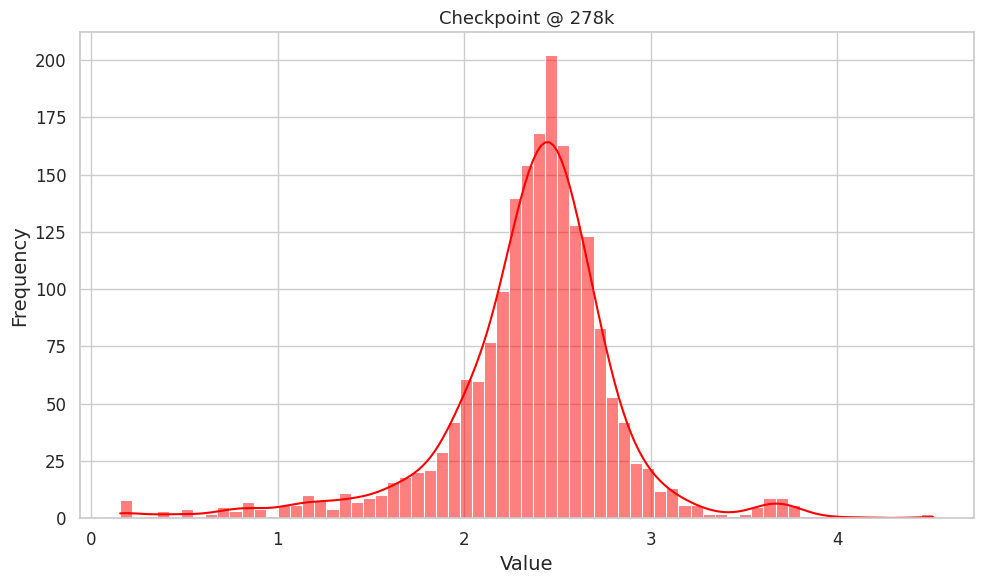

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li2, kde=True, color='red')

# Add title and labels
plt.title('Checkpoint @ 278k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

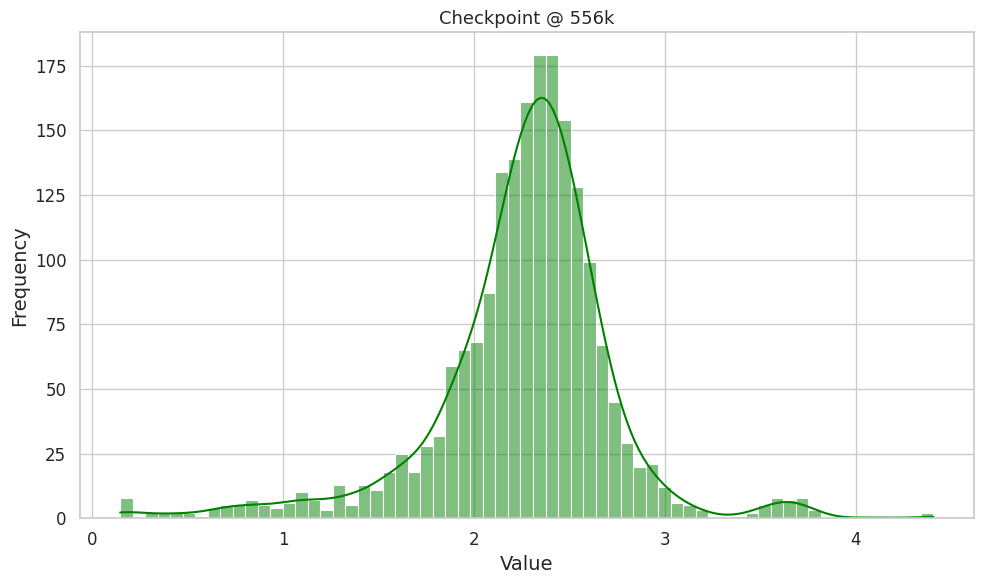

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li3, kde=True, color='green')

# Add title and labels
plt.title('Checkpoint @ 556k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

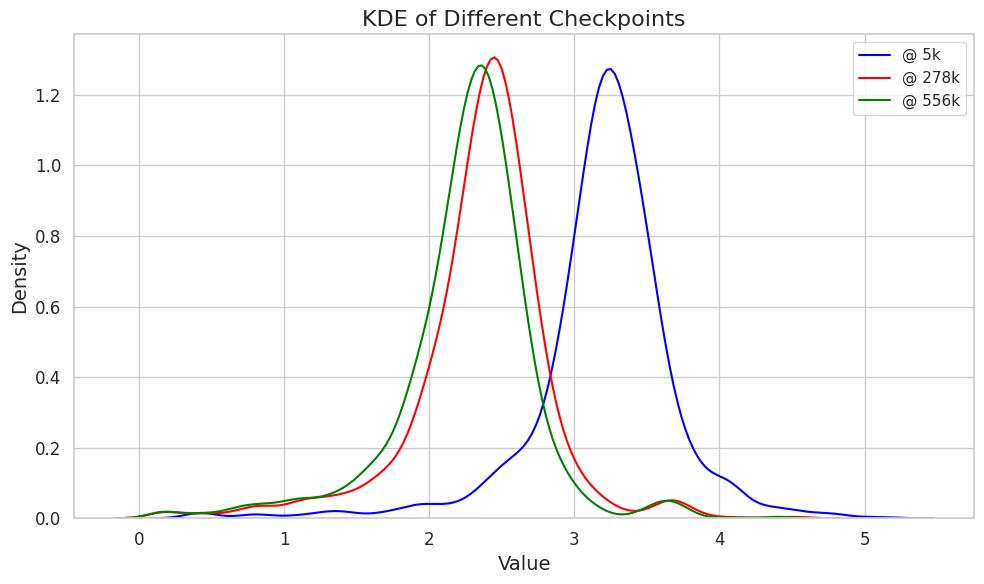

In [ ]:
# plot li1, li2, li3
# Set the style
sns.set(style="whitegrid")

# Plot the KDE for each list
plt.figure(figsize=(10, 6))
sns.kdeplot(li1, label='@ 5k', color='blue')
sns.kdeplot(li2, label='@ 278k', color='red')
sns.kdeplot(li3, label='@ 556k', color='green')

# Add title and labels
plt.title('KDE of Different Checkpoints', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
### Get files

import json

df1 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_5000_summary.json"))
df2 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_278000_summary.json"))
df3 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_557000_summary.json"))


In [ ]:
# Cross Entropy Average

def get_summary(x):
    new_d = {}
    new_d['CE_Loss'] = []

    for k, v in x.items():
        if"CrossEntropyLoss" in k:
            new_d['CE_Loss'].append(v)
        elif "Perplexity" in k:
            pass
        else:
            new_d[k] = v

    return new_d

# for k in df1

In [ ]:
sum = get_summary(df2)
sum

{'CE_Loss': [0.8851879835128784,
  2.1850147247314453,
  2.5476105213165283,
  1.977208137512207,
  2.9451775550842285,
  2.4074013233184814,
  2.459911823272705,
  2.7260851860046387,
  2.0820188522338867,
  2.4143083095550537,
  2.2967095375061035,
  3.062084913253784,
  3.396742105484009,
  2.336442232131958,
  2.2826170921325684,
  2.1197993755340576,
  2.8048737049102783,
  2.289402961730957,
  2.775350332260132,
  2.4609696865081787,
  2.2301604747772217,
  1.9873353242874146,
  2.459315538406372,
  2.544816017150879],
 'eval/downstream/piqa_len_norm': 0.7823721170425415,
 'eval/downstream/hellaswag_len_norm': 0.618399977684021,
 'eval/downstream/winogrande_acc': 0.6408839821815491,
 'eval/downstream/openbook_qa_len_norm': 0.414000004529953,
 'eval/downstream/sciq_acc': 0.9290000200271606,
 'eval/downstream/arc_easy_acc': 0.7122806906700134,
 'eval/downstream/copa_acc': 0.8299999833106995,
 'eval/downstream/rte_len_norm': 0.4693140685558319,
 'eval/downstream/commitment_bank_acc'

In [ ]:
sum = get_summary(df1)
sum

{'CE_Loss': [1.4201509952545166,
  3.0684664249420166,
  3.5949161052703857,
  2.8103318214416504,
  3.6794135570526123,
  3.2331817150115967,
  3.2735531330108643,
  3.4413857460021973,
  2.8898935317993164,
  3.2597696781158447,
  3.4135591983795166,
  3.9448342323303223,
  4.0969624519348145,
  3.152151107788086,
  3.1843032836914062,
  2.714851140975952,
  3.577806234359741,
  3.411628246307373,
  3.4991371631622314,
  3.2809252738952637,
  3.087618350982666,
  2.8375821113586426,
  3.313232898712158,
  3.7747416496276855],
 'eval/downstream/piqa_len_norm': 0.6468988060951233,
 'eval/downstream/hellaswag_len_norm': 0.38040000200271606,
 'eval/downstream/winogrande_acc': 0.5114443302154541,
 'eval/downstream/openbook_qa_len_norm': 0.25600001215934753,
 'eval/downstream/sciq_acc': 0.6079999804496765,
 'eval/downstream/arc_easy_acc': 0.42105263471603394,
 'eval/downstream/copa_acc': 0.6499999761581421,
 'eval/downstream/rte_len_norm': 0.5198556184768677,
 'eval/downstream/commitment_b

In [ ]:
## CHECK
2160*278000/1000000000*2048

1229.78304

In [ ]:
# vllm
from vllm import LLM, SamplingParams

In [ ]:
model = LLM("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_557000.jsonl")]

In [ ]:
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

# olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")

# model = OlmoForCausalLM.from_pretrained("allenai/OLMo-7B", trust_remote_code=True)

In [ ]:

import sys
sys.path.append("/home/hyeonbin/iterpre/OLMo")

from olmo.model import OLMo
from olmo.config import TrainConfig
from olmo.util import clean_opt
from olmo.checkpoint import load_state_dict

import torch
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

args_list = []
yaml_path = "/home/hyeonbin/iterpre/OLMo/configs/official/OLMo-7B.yaml"
cfg = TrainConfig.load(yaml_path, [clean_opt(s) for s in args_list])
cfg.model.init_device = f"cuda:0"
olmo_model = OLMo(cfg.model)
load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
olmo_model = olmo_model.from_checkpoint(checkpoint_dir=load_path)


In [ ]:
print(olmo_model.transformer.blocks[0].attn_out.weight)


In [ ]:
inp = "Language Modeling is"
inp = tokenizer.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = olmo_model.generate(inp, min_steps=10)

f = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tokenizer.decode(f))

In [ ]:
olmo_model.device

In [ ]:
ctx = tokenizer.decode(li[0]['ctx'][0])

In [ ]:
out = tokenizer.decode(li[0]['continuation'][0])

In [ ]:
if ckpt_num == 5000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/wvc30anm/step5000-unsharded/"
elif ckpt_num == 278000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/yuc5kl7s/step278000-unsharded/"
elif ckpt_num == 557000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
else:
    raise AssertionError("Not Implemented Yet!")


In [ ]:
import sys
sys.path.append("/home/hyeonbin/iterpre/OLMo")

import torch
from transformers import AutoModelForCausalLM
import jsonlines
from tqdm.auto import tqdm
import argparse
from torch.nn import functional as F

from olmo.checkpoint import load_state_dict
from olmo.eval import build_evaluators
from olmo.config import TrainConfig
from olmo.util import clean_opt


load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
ckpt = load_state_dict(
    load_path, "model.pt", local_cache=None, map_location="cpu"
)

# k = model.model.state_dict().keys()
# v = ckpt.values()

# d = {k_: v_ for k_, v_ in zip(k, v)}
# model.model.load_state_dict(d)

In [ ]:
import torch
sum(torch.sum(ckpt['transformer.blocks.0.att_proj.weight'][:4096, :] - model.model.layers[0].self_attn.q_proj.weight, axis=0).tolist())

In [ ]:
import torch
inp = "Language Modeling is "
inp = tok.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = model.generate(inp, max_new_tokens=50, temperature=0, do_sample=False)

In [ ]:
print(tok.batch_decode(out, skip_special_tokens=True)[0])

In [ ]:
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")
message = ["Language modeling is"]
inputs = tokenizer(message, return_tensors='pt', return_token_type_ids=False)
# optional verifying cuda
inputs = {k: v.to('cuda') for k,v in inputs.items()}
olmo = olmo.to('cuda')
response = olmo.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=50, top_p=0.95)
print(tokenizer.batch_decode(response, skip_special_tokens=True)[0])

In [ ]:
m.load_state_dict(state_dict)

In [ ]:
import torch
inp = "Language Modeling is "
inp = tok.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = m.generate(inp, max_new_tokens=50, temperature=0, do_sample=False)

In [ ]:
# loss 비교 필요.. 할지도...

In [ ]:
print(tok.decode(inp[0].detach().cpu().numpy().tolist()))
# print(tok.decode(f.detach().cpu().numpy().tolist()))
final_out = out[0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
import json

In [ ]:
# Measure the distirbuiton

import json

result_5k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_5000_validation_set_ppl.jsonl")]
result_278k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_278000_validation_set_ppl.jsonl")]
result_557k = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_557000_validation_set_ppl.jsonl")]

# sort each by x['sample_idx]
result_5k_sorted = sorted(result_5k, key=lambda x: (x['eval_idx'], x['sample_idx']))
result_278k_sorted = sorted(result_278k, key=lambda x: (x['eval_idx'], x['sample_idx']))
result_557k_sorted = sorted(result_557k, key=lambda x: (x['eval_idx'], x['sample_idx']))

In [ ]:
# # ## Measure the distirbuiton

# import json
# import jsonlines

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_5000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_5k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_278000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_278k_sorted)

# with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/exp/OLMo-7B_ckpt_557000_validation_set_ppl_sorted.jsonl", "w") as writer:
#     writer.write_all(result_557k_sorted)

In [ ]:
# now let's plot

li1 = [x['loss'] for x in result_5k_sorted]
li2 = [x['loss'] for x in result_278k_sorted]
li3 = [x['loss'] for x in result_557k_sorted]

In [ ]:
import statistics

# Calculate various statistics
mean = statistics.mean(li1)
median = statistics.median(li1)
variance = statistics.variance(li1)
stdev = statistics.stdev(li1)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li1, bins=np.linspace(0, 0.005, 50), kde=True, color='blue')

# Add title and labels
plt.title('Checkpoint @ 5k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li2, bins=np.linspace(0, 0.005, 50), kde=True, color='red')

# Add title and labels
plt.title('Checkpoint @ 278k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li3, bins=np.linspace(0, 0.01, 50), kde=True, color='green')

# Add title and labels
plt.title('Checkpoint @ 556k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# plot li1, li2, li3
# Set the style
sns.set(style="whitegrid")

# Plot the KDE for each list
plt.figure(figsize=(10, 6))
sns.kdeplot(li1, label='@ 5k', color='blue')
sns.kdeplot(li2, label='@ 278k', color='red')
sns.kdeplot(li3, label='@ 556k', color='green')

# Add title and labels
plt.title('KDE of Different Checkpoints', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
### Get files

import json

df1 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_5000_summary.json"))
df2 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_278000_summary.json"))
df3 = json.load(open("/home/hyeonbin/iterpre/OLMo/olmo/exp/eval_all_557000_summary.json"))


In [ ]:
# Cross Entropy Average

def get_summary(x):
    new_d = {}
    new_d['CE_Loss'] = []

    for k, v in x.items():
        if"CrossEntropyLoss" in k:
            new_d['CE_Loss'].append(v)
        elif "Perplexity" in k:
            pass
        else:
            new_d[k] = v

    return new_d

for k in df1

In [ ]:
## CHECK

In [ ]:
# vllm
from vllm import LLM, SamplingParams

In [ ]:
model = LLM("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_557000.jsonl")]

In [ ]:
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

# olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")

# model = OlmoForCausalLM.from_pretrained("allenai/OLMo-7B", trust_remote_code=True)

In [ ]:

import sys
sys.path.append("/home/hyeonbin/iterpre/OLMo")

from olmo.model import OLMo
from olmo.config import TrainConfig
from olmo.util import clean_opt
from olmo.checkpoint import load_state_dict

import torch
from transformers import AutoModelForCausalLM,AutoTokenizer, OlmoForCausalLM
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

args_list = []
yaml_path = "/home/hyeonbin/iterpre/OLMo/configs/official/OLMo-7B.yaml"
cfg = TrainConfig.load(yaml_path, [clean_opt(s) for s in args_list])
cfg.model.init_device = f"cuda:0"
olmo_model = OLMo(cfg.model)
load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
olmo_model = olmo_model.from_checkpoint(checkpoint_dir=load_path)


In [ ]:
print(olmo_model.transformer.blocks[0].attn_out.weight)


In [ ]:
inp = "Language Modeling is"
inp = tokenizer.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = olmo_model.generate(inp, min_steps=10)

f = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tokenizer.decode(f))

In [ ]:
olmo_model.device

In [ ]:
ctx = tokenizer.decode(li[0]['ctx'][0])

In [ ]:
out = tokenizer.decode(li[0]['continuation'][0])

In [ ]:
if ckpt_num == 5000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/wvc30anm/step5000-unsharded/"
elif ckpt_num == 278000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/yuc5kl7s/step278000-unsharded/"
elif ckpt_num == 557000:
    load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
else:
    raise AssertionError("Not Implemented Yet!")


In [ ]:
import torch
inp = "Language Modeling is "
inp = tok.encode(inp)[:-1]
inp = torch.LongTensor(inp).unsqueeze(0).to(torch.device("cuda:0"))
out = model.generate(inp, max_new_tokens=50, temperature=0, do_sample=False)

In [ ]:
print(tok.batch_decode(out, skip_special_tokens=True)[0])

In [ ]:
from hf_olmo import OLMoForCausalLM, OLMoTokenizerFast

olmo = OLMoForCausalLM.from_pretrained("allenai/OLMo-7B")
tokenizer = OLMoTokenizerFast.from_pretrained("allenai/OLMo-7B")
message = ["Language modeling is"]
inputs = tokenizer(message, return_tensors='pt', return_token_type_ids=False)
# optional verifying cuda
inputs = {k: v.to('cuda') for k,v in inputs.items()}
olmo = olmo.to('cuda')
response = olmo.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=50, top_p=0.95)
print(tokenizer.batch_decode(response, skip_special_tokens=True)[0])

In [ ]:
def dec(x):
    print(tokenizer.decode(x[0]))

dec(li[0]['input_ids'])

In [ ]:
li[1].keys()

In [ ]:
tokenizer.decode(li[0]['label_id'])

In [ ]:
import torch
from transformers import AutoTokenizer
from olmo.tokenizer import Tokenizer
# tok = Tokenizer.from_train_config(cfg)
model.to(torch.device("cuda:1"))
print()
tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import torch
inp = "Hi. How are you doing today?\n"
inp = tok.encode(inp, return_tensors='pt')
inp = torch.LongTensor(inp).to(cfg.model.init_device)
model.eval()

with torch.no_grad():
    out = model.generate(inp)

In [ ]:
print(tok.decode(inp[0].detach().cpu().numpy().tolist()))
# print(tok.decode(f.detach().cpu().numpy().tolist()))
final_out = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
out.token_ids[0][0].detach().cpu().numpy().tolist()

In [ ]:
import torch
from transformers import AutoTokenizer
from olmo.tokenizer import Tokenizer
# tok = Tokenizer.from_train_config(cfg)
model.to(torch.device("cuda:1"))
print()
tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import torch
inp = "Hi. How are you doing today?\n"
inp = tok.encode(inp, return_tensors='pt')
inp = torch.LongTensor(inp).to(cfg.model.init_device)
model.eval()

with torch.no_grad():
    out = model.generate(inp)

In [ ]:
print(tok.decode(inp[0].detach().cpu().numpy().tolist()))
# print(tok.decode(f.detach().cpu().numpy().tolist()))
final_out = out.token_ids[0][0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
#####
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM, OlmoForCausalLM
import torch

tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)
m = AutoModelForCausalLM.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

m.to(torch.device("cuda:0"))
print()
# model.model.load_state_dict()

In [ ]:
import torch
inp = "Hi. How are you doing today?\n"
inp = tok.encode(inp, return_tensors='pt')
inp = torch.LongTensor(inp).to(torch.device("cuda:0"))
model.eval()

with torch.no_grad():
    out = m.generate(inp, max_new_tokens=16)

In [ ]:
final_out = out[0].detach().cpu().numpy().tolist()
print(tok.decode(final_out))

In [ ]:
load_path = f"https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/"
ckpt = load_state_dict(
    load_path, "model.pt", local_cache=None, map_location="cpu"
)

In [ ]:
python scripts/convert_olmo_to_hf_new.py --input_dir "https://olmo-checkpoints.org/ai2-llm/olmo-medium/z4z0x4m9/step557000-unsharded/" --output_dir "/home/hyeonbin/iterpre/OLMo/checkpoints"  --tokenizer_json_path tokenizers/allenai_gpt-neox-olmo-dolma-v1_5.json

In [ ]:
m.model.layers[13].mlp.down_proj.weight
model.transformer.blocks[13].ff_out.weight

In [ ]:
model.transformer.blocks[13].ff_out.weight

In [ ]:
from transformers import AutoTokenizer

In [ ]:
from transformers import AutoTokenizer

tok = AutoTokenizer.from_pretrained("allenai/olmo-7b-hf")

In [ ]:
from datasets import load_dataset

# English only
en = load_dataset("allenai/c4", "en", streaming=True)

In [ ]:
from tqdm.auto import tqdm
import jsonlines

texts = []
i = 0
for x in tqdm(en['train']):
    texts.append(x)  
    i += 1

    if i % 100000 == 0:
        with jsonlines.open("/home/hyeonbin/iterpre/OLMo/olmo/texts.jsonl", "a") as f:
            f.write_all(texts)
        texts = []

In [ ]:
import json
li = [json.loads(x)['text'] for x in open("/home/hyeonbin/iterpre/OLMo/olmo/texts.jsonl")]

In [ ]:
import random
random.seed(42)
random.shuffle(li)

In [ ]:
from transformers import AutoTokenizer
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/olmo-7b-hf", use_fast=True)

In [ ]:
import json
from tqdm.auto import tqdm
from transformers import AutoTokenizer

# Example list of texts
# Initialize the progress bar
progress_bar = tqdm(total=len(li), desc="Tokenizing")
all_li = []
# Define a function to update the progress bar and save to a JSONL file
def tokenize_with_progress(texts, tokenizer, file_path, batch_size=100000):
    with open(file_path, 'a') as f:
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            tokenized_batch = tokenizer.batch_encode_plus(batch)
            all_li.append(tokenized_batch)

            import jsonlines
            with jsonlines.open(file_path, "a") as writer:
                writer.write({"batched_result": tokenized_batch['input_ids']})

            progress_bar.update(len(batch))
            f.flush()

# Path to save the tokenized batches
output_file = '/home/hyeonbin/iterpre/OLMo/olmo/tokens.jsonl'

# Batch tokenize the texts with progress tracking and save to JSONL file
tokenize_with_progress(li, tokenizer, output_file)

# Close the progress bar
progress_bar.close()


In [ ]:
dset

In [ ]:
ckpt_num = 557000
import json
already_done = [json.loads(x) for x in open(f"/home/hyeonbin/iterpre/OLMo/olmo/exp/0722_eval_all_{ckpt_num}.jsonl")]


In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo/olmo/tokens.jsonl")]

In [ ]:
# from 2D to 1D
final_li = [x['batched_result'] for x in li]
from itertools import chain
final_li = list(chain.from_iterable(final_li))

In [ ]:
from tqdm.auto import tqdm

# Initialize lists to store all tokens and their lengths
eos = 50279
chunk_size = 2048
left_over = []

final_chunks = []
curr_chunk = []

# Tokenize in batches

curr_chunk = [] 

for idx, tok in tqdm(enumerate(final_li)):
    final_li[idx] = tok + [eos] # eos token

tokens_flat = list(chain.from_iterable(final_li))

i = 0

while i < len(tokens_flat):
    chunk = tokens_flat[i:i+chunk_size]

    if chunk[0] == eos:
        i += 1
        chunk = tokens_flat[i:i+chunk_size]
    
    final_chunks.append(chunk)
    i += chunk_size

In [ ]:
# save into a dataset format
final_dset = {"input_ids": final_chunks}

from datasets import Dataset
dset = Dataset.from_dict(final_dset)

In [ ]:
import json
li = [json.loads(x) for x in open("/home/hyeonbin/iterpre/OLMo_C4_Infer_Result/eval_557000.jsonl")]

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tok = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torch
dev = torch.device("cuda:0")
model.eval()
model.to(dev)
print()

In [ ]:
from datasets import Dataset

dset = Dataset.load_from_disk("/home/hyeonbin/iterpre/OLMo_C4_data")

Loading dataset from disk:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
# t = torch.LongTensor(dset[0:4]['input_ids']).to(dev)

e = torch.LongTensor(dset[1:2]['input_ids']).to(dev)

In [ ]:
with torch.no_grad():
    out = model(t, labels=t)
    # out1 = model(e, labels=e)


In [ ]:
import torch.nn.functional as F
def get_loss_and_probabilities(outputs, inp):
    with torch.no_grad():
        logits = outputs.logits
        real_loss = outputs.loss.item()

        # Compute per-token loss
        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = inp[..., 1:].contiguous()

        loss_fct = torch.nn.CrossEntropyLoss(reduction='none')
        per_token_loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        per_token_loss = per_token_loss.view(shift_labels.size()).detach().cpu().numpy().tolist()

        # Convert logits to probabilities
        shift_probs = F.softmax(shift_logits, dim=-1)
        # Get the probabilities of the actual next tokens
        shift_labels_unsqueezed = shift_labels.unsqueeze(-1)
        token_probs = torch.gather(shift_probs, 2, shift_labels_unsqueezed).squeeze(-1).detach().cpu().numpy().tolist()

    return real_loss, per_token_loss, token_probs

# t1 = get_loss_and_probabilities(out, t)

In [ ]:
t2 = get_loss_and_probabilities(out1, e)

In [ ]:
a = t1[1][1]
b = t2[1][0]

In [ ]:
ee = []
for x, y in zip(a, b):
    ee.append(abs(x-y))

In [ ]:
sum(ee)

0.011431925930082798

In [ ]:
sum(a)

4678.054395581181

In [ ]:
sum(b)

4678.055059796949

Load raw Data

In [1]:
import json

li = []

for x in open("/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_278000_tmp0.jsonl"):
    try:
        li.append(json.loads(x))
    except:
        print("[Error] Skipping ...")
        
for x in open('/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_278000_tmp.jsonl'):
    try:
        li.append(json.loads(x))
    except:
        print("[Error] Skipping ...")

In [2]:
dedup_li = [x['sample_idx'] for x in li]
print(f"total: {len(li)}")
print(f"dedup: {len(set(dedup_li))}")

total: 572255
dedup: 572119


In [6]:
to_save = {}
for x in li:
    if x['sample_idx'] not in to_save:
        mean = sum(x['per_token_loss'])/len(x['per_token_loss'])
        x['loss_mean'] = mean
        to_save[x['sample_idx']] = x
print(len(to_save))
li = [x for x in to_save.values()]


572119


In [14]:
def write_jsonl_file(file_path, data):
    with open(file_path , encoding= "utf-8",mode="w") as file: 
        for i in data: 
            file.write(json.dumps(i) + "\n")
    print(f"Wrote file at {file_path}")
    
write_jsonl_file('/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_278k_f.jsonl', li)

Wrote file at /data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_278k_f.jsonl


In [11]:
import json
from tqdm.auto import tqdm

li = []

for x in tqdm(open('/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_278k_f.jsonl'), total = 572119):
    try:
        li.append(json.loads(x))
    except:
        print("[Error] Skipping ...")
print(len(li))
        

572119


In [12]:
li_loss = [x['loss_mean'] for x in li]

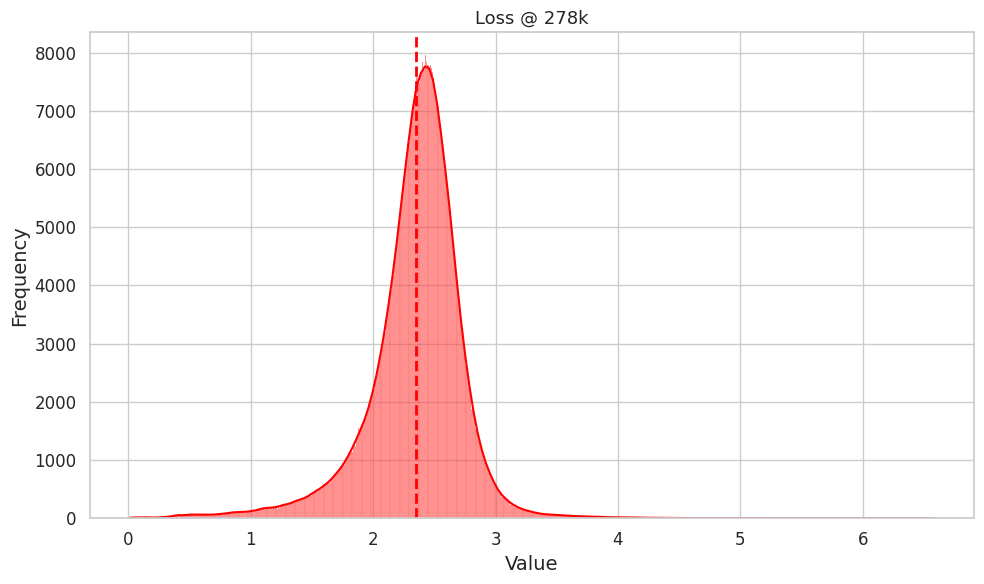

In [13]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li_loss, kde=True, color='red')

# Add a vertical line at the mean
mean_value = np.mean(li_loss)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.5f}')

# Add title and labels
plt.title('Loss @ 278k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
import statistics

# Calculate various statistics
mean = statistics.mean(li_loss)
median = statistics.median(li_loss)
variance = statistics.variance(li_loss)
stdev = statistics.stdev(li_loss)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

quantiles = np.quantile(li_loss, [0.25, 0.5, 0.75])

print(f"25th percentile (Q1): {quantiles[0]}")
print(f"50th percentile (Median): {quantiles[1]}")
print(f"75th percentile (Q3): {quantiles[2]}")
print(f"top_last : {li_loss[204800]}")
print(f"bottom_last : {li_loss[-204800]}")

Mean: 2.348081750078697
Median: 2.3924242739291692
Variance: 0.15196653703685786
Standard Deviation: 0.3898288560854082
25th percentile (Q1): 2.188493386736801
50th percentile (Median): 2.3924242739291692
75th percentile (Q3): 2.567647658789074
top_last : 2.7869544880676647
bottom_last : 2.321635218820738


In [15]:
data_num = 204800

# Step 1: Sort the list by the 'loss' value
sorted_data = sorted(li, key=lambda x: x['loss_mean'])

# Step 2: Determine the indices for the chunks
n = len(sorted_data)
top_40_percent_index = int(n * 0.4)
middle_20_percent_index = int(n * 0.6)

# Step 3: Slice the sorted list into chunks
top_40_percent_chunk = sorted_data[:data_num]
middle_20_percent_chunk = sorted_data[data_num:-data_num]
bottom_40_percent_chunk = sorted_data[-data_num:]

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk)}")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk)}")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk)}")

# Verify the mean
print(f"Top 40% chunk mean: {sum([x['loss_mean'] for x in top_40_percent_chunk])/len(top_40_percent_chunk)}")
print(f"Middle 20% chunk mean: {sum([x['loss_mean'] for x in middle_20_percent_chunk])/len(middle_20_percent_chunk)}")
print(f"Bottom 40% chunk mean: {sum([x['loss_mean'] for x in bottom_40_percent_chunk])/len(bottom_40_percent_chunk)}")

Top 40% chunk size: 204800
Middle 20% chunk size: 162519
Bottom 40% chunk size: 204800
Top 40% chunk mean: 1.9750238345917503
Middle 20% chunk mean: 2.391239466669466
Bottom 40% chunk mean: 2.686892071436008


In [22]:

print(f"Mean:{mean}|")
print(f"Median:{median}|")
print(f"Variance:{variance}|")
print(f"Standard Deviation:{stdev}|")

print(f"25th percentile (Q1):{quantiles[0]}|")
print(f"50th percentile (Median):{quantiles[1]}|")
print(f"75th percentile (Q3):{quantiles[2]}|")
print(f"top_last:{li_loss[204800]}|")
print(f"bottom_last:{li_loss[-204800]}|")

print(f"Top 40% chunk size:{len(top_40_percent_chunk)}|")
print(f"Middle 20% chunk size:{len(middle_20_percent_chunk)}|")
print(f"Bottom 40% chunk size:{len(bottom_40_percent_chunk)}|")

# Verify the mean
print(f"Top 40% chunk mean:{sum([x['loss_mean'] for x in top_40_percent_chunk])/len(top_40_percent_chunk)}|")
print(f"Middle 20% chunk mean:{sum([x['loss_mean'] for x in middle_20_percent_chunk])/len(middle_20_percent_chunk)}|")
print(f"Bottom 40% chunk mean:{sum([x['loss_mean'] for x in bottom_40_percent_chunk])/len(bottom_40_percent_chunk)}|")

Mean:2.348081750078697|
Median:2.3924242739291692|
Variance:0.15196653703685786|
Standard Deviation:0.3898288560854082|
25th percentile (Q1):2.188493386736801|
50th percentile (Median):2.3924242739291692|
75th percentile (Q3):2.567647658789074|
top_last:2.7869544880676647|
bottom_last:2.321635218820738|
Top 40% chunk size:204800|
Middle 20% chunk size:162518|
Bottom 40% chunk size:204800|
Top 40% chunk mean:1.9750238345917503|
Middle 20% chunk mean:2.391239475855209|
Bottom 40% chunk mean:2.686892071436008|


In [19]:
# top40 = {'input_ids': [x['sample'] for x in top_40_percent_chunk]}

# from datasets import Dataset
# dset = Dataset.from_dict(top40)
# dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/278000_easy")

/data/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Saving the dataset (4/4 shards): 100%|██████████| 204800/204800 [00:08<00:00, 25149.26 examples/s]


In [20]:
# bottom40 = {'input_ids': [x['sample'] for x in bottom_40_percent_chunk]}

# from datasets import Dataset
# dset = Dataset.from_dict(bottom40)
# dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/278000_hard")

Saving the dataset (4/4 shards): 100%|██████████| 204800/204800 [00:06<00:00, 29294.08 examples/s]


In [4]:
import json
from tqdm.auto import tqdm
li_557k = []

for x in tqdm(open("/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_557k_ckpt.jsonl"), total=500000):
    try:
        li_557k.append(json.loads(x))
    except:
        print("[Error] Skipping ...")
        

  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 500000/500000 [18:41<00:00, 445.78it/s]  


In [5]:
to_save_557k = {}
for x in li_557k:
    if x['sample_idx'] not in to_save_557k:
        if len(x['per_token_loss']) == 1:
            mean = sum(x['per_token_loss'][0])/len(x['per_token_loss'][0])
        else:
            mean = sum(x['per_token_loss'])/len(x['per_token_loss'])
        x['loss_mean'] = mean
        to_save_557k[x['sample_idx']] = x
print(len(to_save_557k))

500000


In [6]:
to_save = {x['sample_idx']:x for x in li}

NameError: name 'li' is not defined

In [6]:
len(to_save)

572119

In [7]:
ids_557k = set(to_save_557k.keys())
ids_278k = set(to_save.keys())
print(len(ids_557k))
print(len(ids_278k))
# len(ids_557k & ids_278k)

common_ids = ids_557k & ids_278k
len(common_ids)

500000
572119


499823

In [8]:
random_idx = 337897
to_save_557k[random_idx]['sample'] == to_save[random_idx]['sample']

True

In [9]:
li_loss_557k = [x['loss_mean'] for x in li_557k]

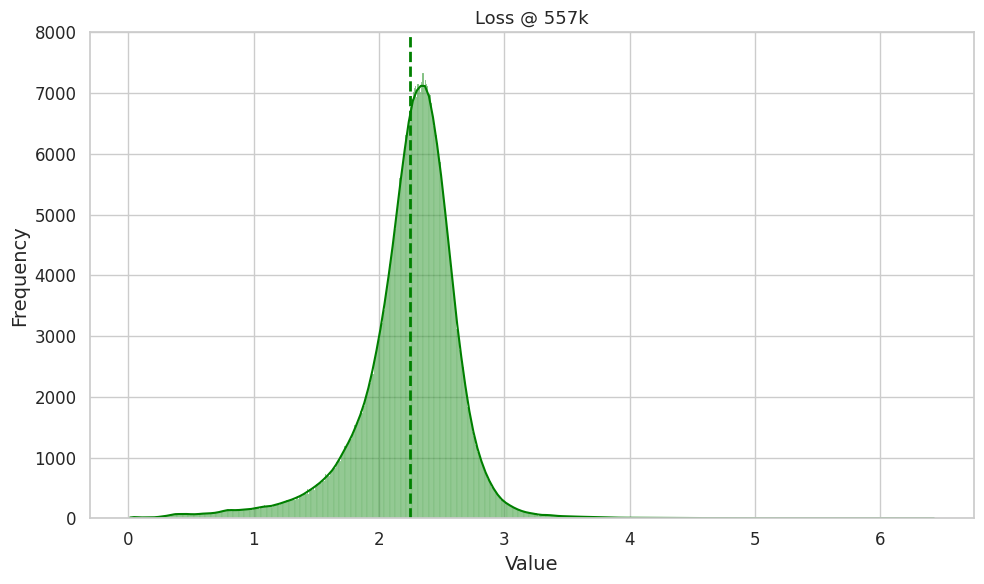

In [10]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li_loss_557k, kde=True, color='green')

# Add a vertical line at the mean
mean_value = np.mean(li_loss_557k)
plt.axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.5f}')

# Add title and labels
plt.title('Loss @ 557k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(0,8000)
# Show the plot
plt.tight_layout()
plt.show()

In [33]:
import statistics

# Calculate various statistics
mean = statistics.mean(li_loss_557k)
median = statistics.median(li_loss_557k)
variance = statistics.variance(li_loss_557k)
stdev = statistics.stdev(li_loss_557k)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

quantiles = np.quantile(li_loss_557k, [0.25, 0.5, 0.75])

print(f"25th percentile (Q1): {quantiles[0]}")
print(f"50th percentile (Median): {quantiles[1]}")
print(f"75th percentile (Q3): {quantiles[2]}")
print(f"top_last : {li_loss_557k[204800]}")
print(f"bottom_last : {li_loss_557k[-204800]}")

Mean: 2.2464481017409237
Median: 2.2972039052699627
Variance: 0.15595333216204585
Standard Deviation: 0.3949092707977946
25th percentile (Q1): 2.088017911987944
50th percentile (Median): 2.2972039052699627
75th percentile (Q3): 2.473804717295
top_last : 2.5928836100927497
bottom_last : 2.367914897110798


In [16]:
data_num = 204800

# Step 1: Sort the list by the 'loss' value
sorted_data = sorted(li_557k, key=lambda x: x['loss_mean'])

# # Step 2: Determine the indices for the chunks
# n = len(sorted_data)
# top_40_percent_index = int(n * 0.4)
# middle_20_percent_index = int(n * 0.6)

# Step 3: Slice the sorted list into chunks
top_40_percent_chunk_557k = sorted_data[:data_num]
middle_20_percent_chunk_557k = sorted_data[data_num:-data_num]
bottom_40_percent_chunk_557k = sorted_data[-data_num:]

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk_557k)}")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk_557k)}")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk_557k)}")

# Verify the mean
print(f"Top 40% chunk mean: {sum([x['loss_mean'] for x in top_40_percent_chunk_557k])/len(top_40_percent_chunk_557k)}")
print(f"Middle 20% chunk mean: {sum([x['loss_mean'] for x in middle_20_percent_chunk_557k])/len(middle_20_percent_chunk_557k)}")
print(f"Bottom 40% chunk mean: {sum([x['loss_mean'] for x in bottom_40_percent_chunk_557k])/len(bottom_40_percent_chunk_557k)}")

Top 40% chunk size: 204800
Middle 20% chunk size: 90400
Bottom 40% chunk size: 204800
Top 40% chunk mean: 1.909266813602388
Middle 20% chunk mean: 2.2970788421330663
Bottom 40% chunk mean: 2.5612806646282977


In [35]:

print(f"Mean:{mean}|")
print(f"Median:{median}|")
print(f"Variance:{variance}|")
print(f"Standard Deviation:{stdev}|")

print(f"25th percentile (Q1):{quantiles[0]}|")
print(f"50th percentile (Median):{quantiles[1]}|")
print(f"75th percentile (Q3):{quantiles[2]}|")
print(f"top_last:{li_loss_557k[204800]}|")
print(f"bottom_last:{li_loss_557k[-204800]}|")

print(f"Top 40% chunk size:{len(top_40_percent_chunk_557k)}|")
print(f"Middle 20% chunk size:{len(middle_20_percent_chunk_557k)}|")
print(f"Bottom 40% chunk size:{len(bottom_40_percent_chunk_557k)}|")

# Verify the mean
print(f"Top 40% chunk mean:{sum([x['loss_mean'] for x in top_40_percent_chunk_557k])/len(top_40_percent_chunk_557k)}|")
print(f"Middle 20% chunk mean:{sum([x['loss_mean'] for x in middle_20_percent_chunk_557k])/len(middle_20_percent_chunk_557k)}|")
print(f"Bottom 40% chunk mean:{sum([x['loss_mean'] for x in bottom_40_percent_chunk_557k])/len(bottom_40_percent_chunk_557k)}|")

Mean:2.2464481017409237|
Median:2.2972039052699627|
Variance:0.15595333216204585|
Standard Deviation:0.3949092707977946|
25th percentile (Q1):2.088017911987944|
50th percentile (Median):2.2972039052699627|
75th percentile (Q3):2.473804717295|
top_last:2.5928836100927497|
bottom_last:2.367914897110798|
Top 40% chunk size:204800|
Middle 20% chunk size:90400|
Bottom 40% chunk size:204800|
Top 40% chunk mean:1.909266813602388|
Middle 20% chunk mean:2.2970788421330663|
Bottom 40% chunk mean:2.5612806646282977|


In [36]:
print(len(set([x['sample_idx'] for x in top_40_percent_chunk]) & set([x['sample_idx'] for x in top_40_percent_chunk_557k])))
print(len(set([x['sample_idx'] for x in middle_20_percent_chunk]) & set([x['sample_idx'] for x in middle_20_percent_chunk_557k])))
print(len(set([x['sample_idx'] for x in bottom_40_percent_chunk]) & set([x['sample_idx'] for x in bottom_40_percent_chunk_557k])))

178454
87816
175991


only common 557k & 278k ids

In [22]:
li_278k = [x for x in li if x['sample_idx'] in common_ids]
print(len(li_278k))

499823


In [25]:
li_loss_278k = [x['loss_mean'] for x in li_278k]

In [28]:
import statistics
import numpy as np
# Calculate various statistics
mean = statistics.mean(li_loss_278k)
median = statistics.median(li_loss_278k)
variance = statistics.variance(li_loss_278k)
stdev = statistics.stdev(li_loss_278k)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

quantiles = np.quantile(li_loss_278k, [0.25, 0.5, 0.75])

print(f"25th percentile (Q1): {quantiles[0]}")
print(f"50th percentile (Median): {quantiles[1]}")
print(f"75th percentile (Q3): {quantiles[2]}")
print(f"top_last : {li_loss_278k[204800]}")
print(f"bottom_last : {li_loss_278k[-204800]}")

Mean: 2.3484822711516116
Median: 2.3927442602592284
Variance: 0.15194876057015966
Standard Deviation: 0.38980605507118493
25th percentile (Q1): 2.1891531796441193
50th percentile (Median): 2.3927442602592284
75th percentile (Q3): 2.567987044763542
top_last : 2.345072419082401
bottom_last : 2.4917805083574995


In [23]:
data_num = 204800

# Step 1: Sort the list by the 'loss' value
sorted_data = sorted(li_278k, key=lambda x: x['loss_mean'])

# Step 2: Determine the indices for the chunks
# n = len(sorted_data)
# top_40_percent_index = int(n * 0.4)
# middle_20_percent_index = int(n * 0.6)

# Step 3: Slice the sorted list into chunks
top_40_percent_chunk_278k = sorted_data[:data_num]
middle_20_percent_chunk_278k = sorted_data[data_num:-data_num]
bottom_40_percent_chunk_278k = sorted_data[-data_num:]

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk_278k)}")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk_278k)}")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk_278k)}")

# Verify the mean
print(f"Top 40% chunk mean: {sum([x['loss_mean'] for x in top_40_percent_chunk_278k])/len(top_40_percent_chunk_278k)}")
print(f"Middle 20% chunk mean: {sum([x['loss_mean'] for x in middle_20_percent_chunk_278k])/len(middle_20_percent_chunk_278k)}")
print(f"Bottom 40% chunk mean: {sum([x['loss_mean'] for x in bottom_40_percent_chunk_278k])/len(bottom_40_percent_chunk_278k)}")

Top 40% chunk size: 204800
Middle 20% chunk size: 90223
Bottom 40% chunk size: 204800
Top 40% chunk mean: 2.0177703535766494
Middle 20% chunk mean: 2.3922370598590557
Bottom 40% chunk mean: 2.659918366941662


In [29]:

print(f"Mean:{mean}|")
print(f"Median:{median}|")
print(f"Variance:{variance}|")
print(f"Standard Deviation:{stdev}|")

print(f"25th percentile (Q1):{quantiles[0]}|")
print(f"50th percentile (Median):{quantiles[1]}|")
print(f"75th percentile (Q3):{quantiles[2]}|")
print(f"top_last:{li_loss_278k[204800]}|")
print(f"bottom_last:{li_loss_278k[-204800]}|")

print(f"Top 40% chunk size:{len(top_40_percent_chunk_278k)}|")
print(f"Middle 20% chunk size:{len(middle_20_percent_chunk_278k)}|")
print(f"Bottom 40% chunk size:{len(bottom_40_percent_chunk_278k)}|")

# Verify the mean
print(f"Top 40% chunk mean:{sum([x['loss_mean'] for x in top_40_percent_chunk_278k])/len(top_40_percent_chunk_278k)}|")
print(f"Middle 20% chunk mean:{sum([x['loss_mean'] for x in middle_20_percent_chunk_278k])/len(middle_20_percent_chunk_278k)}|")
print(f"Bottom 40% chunk mean:{sum([x['loss_mean'] for x in bottom_40_percent_chunk_278k])/len(bottom_40_percent_chunk_278k)}|")

Mean:2.3484822711516116|
Median:2.3927442602592284|
Variance:0.15194876057015966|
Standard Deviation:0.38980605507118493|
25th percentile (Q1):2.1891531796441193|
50th percentile (Median):2.3927442602592284|
75th percentile (Q3):2.567987044763542|
top_last:2.345072419082401|
bottom_last:2.4917805083574995|
Top 40% chunk size:204800|
Middle 20% chunk size:90223|
Bottom 40% chunk size:204800|
Top 40% chunk mean:2.0177703535766494|
Middle 20% chunk mean:2.3922370598590557|
Bottom 40% chunk mean:2.659918366941662|


In [30]:
top40 = {'input_ids': [x['sample'] for x in top_40_percent_chunk_278k]}
import random
random.shuffle(top40)

from datasets import Dataset
dset = Dataset.from_dict(top40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/278000_easy_shuffle")

Saving the dataset (4/4 shards): 100%|██████████| 204800/204800 [00:08<00:00, 24383.28 examples/s]


In [31]:
bottom40 = {'input_ids': [x['sample'] for x in bottom_40_percent_chunk_278k]}
import random
random.shuffle(bottom40)

from datasets import Dataset
dset = Dataset.from_dict(bottom40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/278000_hard_shuffle")

Saving the dataset (4/4 shards): 100%|██████████| 204800/204800 [00:07<00:00, 27692.88 examples/s]


In [16]:
top40 = {'input_ids': [x['sample'] for x in top_40_percent_chunk_557k]}
import random
random.shuffle(top40)
from datasets import Dataset
dset = Dataset.from_dict(top40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/557000_easy_shuffle")

Saving the dataset (4/4 shards): 100%|██████████| 204800/204800 [00:07<00:00, 26909.15 examples/s]


In [17]:
bottom40 = {'input_ids': [x['sample'] for x in bottom_40_percent_chunk_557k]}
import random
random.shuffle(bottom40)

from datasets import Dataset
dset = Dataset.from_dict(bottom40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/557000_hard_shuffle")

Saving the dataset (4/4 shards): 100%|██████████| 204800/204800 [00:07<00:00, 27514.15 examples/s]


In [1]:
import json
from tqdm.auto import tqdm
print("\n\n", "-"*50,"Loading 5k")

li_5k = []
for x in tqdm(open("/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/output_part1.jsonl"), total=440013):
    try:
        li_5k.append(json.loads(x))
    except:
        print("[Error] Skipping ...")
print("Loading 2nd part...")
for x in tqdm(open("/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/output_part2.jsonl"), total=440013):
    try:
        li_5k.append(json.loads(x))
    except:
        print("[Error] Skipping ...")
        
to_save_5k = {}
for x in li_5k:
    if x['sample_idx'] not in to_save_5k:
        if len(x['per_token_loss']) == 1:
            mean = sum(x['per_token_loss'][0])/len(x['per_token_loss'][0])
        else:
            mean = sum(x['per_token_loss'])/len(x['per_token_loss'])
        x['loss_mean'] = mean
        to_save_5k[x['sample_idx']] = x
print("length of 5k : ",len(to_save_5k))

/data/jiyeon/.conda/envs/olmo/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




 -------------------------------------------------- Loading 5k


100%|██████████| 440013/440013 [14:59<00:00, 489.26it/s]  


length of 5k :  878926


In [2]:
li_5k = [x for id, x in to_save_5k.items()]
li_loss_5k = [x['loss_mean'] for x in li_5k]

In [7]:
len(li_loss_5k)

878926

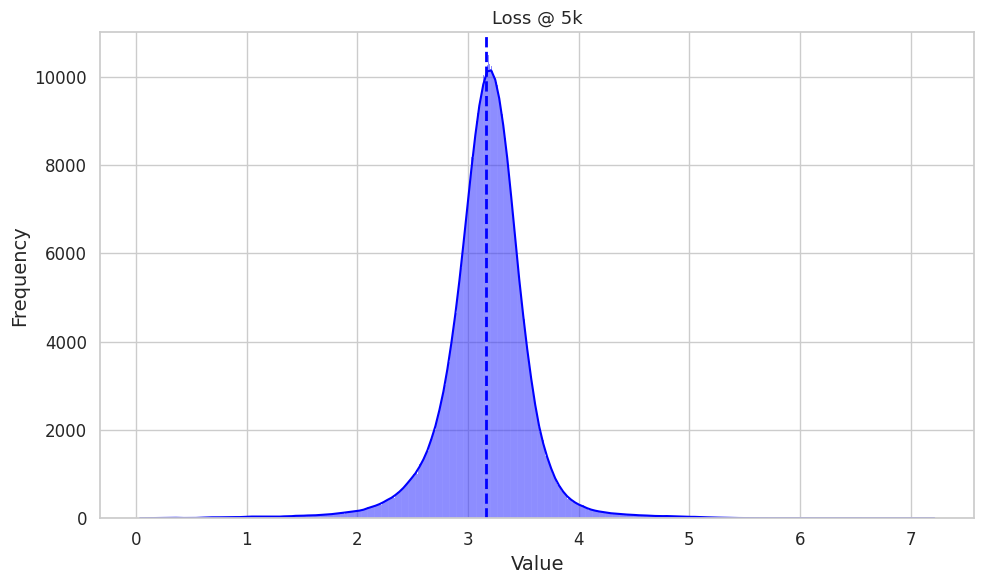

In [3]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li_loss_5k, kde=True, color='blue')

# Add a vertical line at the mean
mean_value = np.mean(li_loss_5k)
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.5f}')

# Add title and labels
plt.title('Loss @ 5k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(0,11000)
# Show the plot
plt.tight_layout()
plt.show()

In [6]:
import statistics
import numpy as np
# Calculate various statistics
mean = statistics.mean(li_loss_5k)
median = statistics.median(li_loss_5k)
variance = statistics.variance(li_loss_5k)
stdev = statistics.stdev(li_loss_5k)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

quantiles = np.quantile(li_loss_5k, [0.25, 0.5, 0.75])

print(f"25th percentile (Q1): {quantiles[0]}")
print(f"50th percentile (Median): {quantiles[1]}")
print(f"75th percentile (Q3): {quantiles[2]}")
print(f"top_last : {li_loss_5k[204800]}")
print(f"bottom_last : {li_loss_5k[-204800]}")

Mean: 3.1597658706686014
Median: 3.181170946547832
Variance: 0.15460410553423382
Standard Deviation: 0.3931972857666159
25th percentile (Q1): 2.986115307870671
50th percentile (Median): 3.181170946547832
75th percentile (Q3): 3.3633589474978773
top_last : 3.291358325751228
bottom_last : 2.9828706637277134


In [17]:

data_num = 204800

# Step 1: Sort the list by the 'loss' value
sorted_data = sorted(li_5k, key=lambda x: x['loss_mean'])

# Step 2: Determine the indices for the chunks
# n = len(sorted_data)
# top_40_percent_index = int(n * 0.4)
# middle_20_percent_index = int(n * 0.6)

# Step 3: Slice the sorted list into chunks
top_40_percent_chunk_5k = sorted_data[:data_num]
middle_20_percent_chunk_5k = sorted_data[data_num:-data_num]
bottom_40_percent_chunk_5k = sorted_data[-data_num:]

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk_5k)}")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk_5k)}")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk_5k)}")

# Verify the mean
print(f"Top 40% chunk mean: {sum([x['loss_mean'] for x in top_40_percent_chunk_5k])/len(top_40_percent_chunk_5k)}")
print(f"Middle 20% chunk mean: {sum([x['loss_mean'] for x in middle_20_percent_chunk_5k])/len(middle_20_percent_chunk_5k)}")
print(f"Bottom 40% chunk mean: {sum([x['loss_mean'] for x in bottom_40_percent_chunk_5k])/len(bottom_40_percent_chunk_5k)}")

Top 40% chunk size: 204800
Middle 20% chunk size: 469326
Bottom 40% chunk size: 204800
Top 40% chunk mean: 2.6744093524216304
Middle 20% chunk mean: 3.1789058600022737
Bottom 40% chunk mean: 3.6012605987104904


In [15]:

print(f"Mean:{mean}|")
print(f"Median:{median}|")
print(f"Variance:{variance}|")
print(f"Standard Deviation:{stdev}|")

print(f"25th percentile (Q1):{quantiles[0]}|")
print(f"50th percentile (Median):{quantiles[1]}|")
print(f"75th percentile (Q3):{quantiles[2]}|")
print(f"top_last:{li_loss_5k[204800]}|")
print(f"bottom_last:{li_loss_5k[-204800]}|")

print(f"Top 40% chunk size:{len(top_40_percent_chunk_5k)}|")
print(f"Middle 20% chunk size:{len(middle_20_percent_chunk_5k)}|")
print(f"Bottom 40% chunk size:{len(bottom_40_percent_chunk_5k)}|")

# Verify the mean
print(f"Top 40% chunk mean:{sum([x['loss_mean'] for x in top_40_percent_chunk_5k])/len(top_40_percent_chunk_5k)}|")
print(f"Middle 20% chunk mean:{sum([x['loss_mean'] for x in middle_20_percent_chunk_5k])/len(middle_20_percent_chunk_5k)}|")
print(f"Bottom 40% chunk mean:{sum([x['loss_mean'] for x in bottom_40_percent_chunk_5k])/len(bottom_40_percent_chunk_5k)}|")

Mean:3.1597658706686014|
Median:3.181170946547832|
Variance:0.15460410553423382|
Standard Deviation:0.3931972857666159|
25th percentile (Q1):2.986115307870671|
50th percentile (Median):3.181170946547832|
75th percentile (Q3):3.3633589474978773|
top_last:3.291358325751228|
bottom_last:2.9828706637277134|
Top 40% chunk size:204800|
Middle 20% chunk size:469326|
Bottom 40% chunk size:204800|
Top 40% chunk mean:2.6744093524216304|
Middle 20% chunk mean:3.1789058600022737|
Bottom 40% chunk mean:3.6012605987104904|


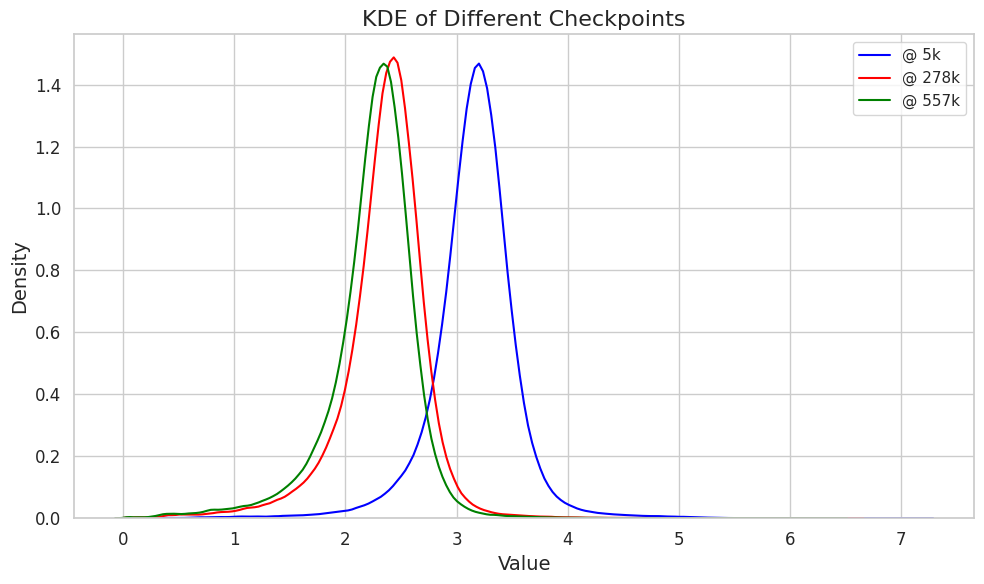

In [14]:
# plot li1, li2, li3
# Set the style
sns.set(style="whitegrid")

# Plot the KDE for each list
plt.figure(figsize=(10, 6))
sns.kdeplot(li_loss_5k, label='@ 5k', color='blue')
sns.kdeplot(li_loss, label='@ 278k', color='red') #li_loss_278k : common ids
sns.kdeplot(li_loss_557k, label='@ 557k', color='green')

# Add title and labels
plt.title('KDE of Different Checkpoints', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
ids_278k = {x['sample_idx']:x for x in li}
ids_5k = {x['sample_idx']:x for x in li_5k}
ids_557k = {x['sample_idx']:x for x in li_557k}


top_278k = {x['sample_idx']:x for x in top_40_percent_chunk}
top_5k = {x['sample_idx']:x for x in top_40_percent_chunk_5k}
top_557k = {x['sample_idx']:x for x in top_40_percent_chunk_557k}
# print(f"Middle 20% chunk size: {len(middle_20_percent_chunk)}")
# print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk)}")

In [36]:
common = set(ids_5k.keys()) & set(ids_278k.keys()) & set(ids_557k.keys()) 
len(common)

341844

In [ ]:
common_ids_278k = [ids_278k[x] for x in list(common)]
# common_ids_278k = [x for id, x in ids_278k.items() if x in common]
sorted_data = sorted(common_ids_278k, key=lambda x: x['loss_mean'])
len(sorted_data)
# top_40_percent_chunk_278k = sorted_data[:data_num]
# middle_20_percent_chunk_278k = sorted_data[data_num:-data_num]
# bottom_40_percent_chunk_278k = sorted_data[-data_num:]

In [38]:
len(sorted_data)

572119

In [ ]:
len(common)

In [45]:

import json

li_5k = []

for x in open('/data/jiyeon/OLMo/analysis/OLMo_C4_Infer_Result/eval_5000_tmp.jsonl'):
    try:
        li_5k.append(json.loads(x))
    except:
        print("[Error] Skipping ...")
        

In [46]:
dedup_li_5k = [x['sample_idx'] for x in li_5k]
print(f"total: {len(li_5k)}")
print(f"dedup: {len(set(dedup_li_5k))}")

total: 79360
dedup: 76496


In [47]:
to_save_5k = {}
for x in li_5k:
    if x['sample_idx'] not in to_save_5k:
        mean = sum(x['per_token_loss'])/len(x['per_token_loss'])
        x['loss_mean'] = mean
        to_save_5k[x['sample_idx']] = x
print(len(to_save_5k))
li_5k = [x for x in to_save_5k.values()]


76496


In [48]:
ids_5k = set(to_save_5k.keys())
print(len(ids_5k))
print(len(ids_557k & ids_278k & ids_5k))
print(len(ids_278k & ids_5k))
print(len(ids_557k & ids_5k))
# print(ids_5k - ids_278k)

76496
76389
76389
76496


In [49]:
li_loss_5k = [x['loss_mean'] for x in li_5k]

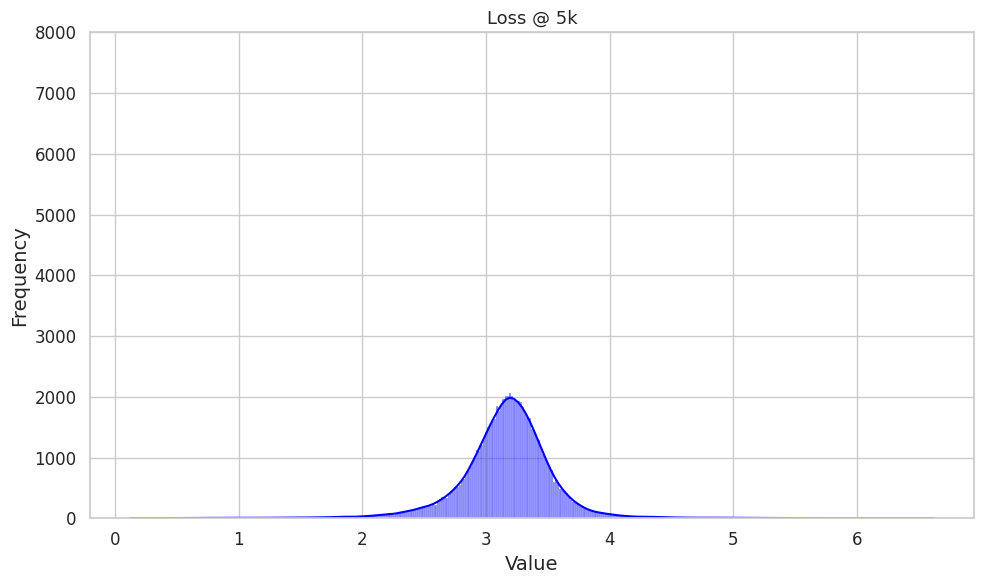

In [50]:
# Plot histogram from 0 ~ 0.005
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(li_loss_5k, kde=True, color='blue')

# Add title and labels
plt.title('Loss @ 5k', fontsize=13)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(0,8000)
# Show the plot
plt.tight_layout()
plt.show()

In [51]:
import statistics

# Calculate various statistics
mean = statistics.mean(li_loss_5k)
median = statistics.median(li_loss_5k)
variance = statistics.variance(li_loss_5k)
stdev = statistics.stdev(li_loss_5k)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {stdev}")

quantiles = np.quantile(li_loss_5k, [0.25, 0.5, 0.75])

print(f"25th percentile (Q1): {quantiles[0]}")
print(f"50th percentile (Median): {quantiles[1]}")
print(f"75th percentile (Q3): {quantiles[2]}")
# print(f"top_last : {li_loss_5k[204800]}")
# print(f"bottom_last : {li_loss_5k[-204800]}")

Mean: 3.1606311397668083
Median: 3.183123491861571
Variance: 0.15705092568283893
Standard Deviation: 0.396296512327372
25th percentile (Q1): 2.987611998023002
50th percentile (Median): 3.183123491861571
75th percentile (Q3): 3.364476911308052


In [53]:
len(li_5k)*0.4

30598.4

In [54]:
data_num = 30598

# Step 1: Sort the list by the 'loss' value
sorted_data = sorted(li_5k, key=lambda x: x['loss_mean'])

# # Step 2: Determine the indices for the chunks
# n = len(sorted_data)
# top_40_percent_index = int(n * 0.4)
# middle_20_percent_index = int(n * 0.6)

# Step 3: Slice the sorted list into chunks
top_40_percent_chunk_5k = sorted_data[:data_num]
middle_20_percent_chunk_5k = sorted_data[data_num:-data_num]
bottom_40_percent_chunk_5k = sorted_data[-data_num:]

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk_5k)}")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk_5k)}")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk_5k)}")

# Verify the mean
print(f"Top 40% chunk mean: {sum([x['loss_mean'] for x in top_40_percent_chunk_5k])/len(top_40_percent_chunk_5k)}")
print(f"Middle 20% chunk mean: {sum([x['loss_mean'] for x in middle_20_percent_chunk_5k])/len(middle_20_percent_chunk_5k)}")
print(f"Bottom 40% chunk mean: {sum([x['loss_mean'] for x in bottom_40_percent_chunk_5k])/len(bottom_40_percent_chunk_5k)}")

Top 40% chunk size: 30598
Middle 20% chunk size: 15300
Bottom 40% chunk size: 30598
Top 40% chunk mean: 2.8281552665518417
Middle 20% chunk mean: 3.1828654008053574
Bottom 40% chunk mean: 3.481989155805223


In [55]:
print(f"Mean:{mean}|")
print(f"Median:{median}|")
print(f"Variance:{variance}|")
print(f"Standard Deviation:{stdev}|")

print(f"25th percentile (Q1):{quantiles[0]}|")
print(f"50th percentile (Median):{quantiles[1]}|")
print(f"75th percentile (Q3):{quantiles[2]}|")
print(f"top_last:{li_loss_557k[data_num]}|")
print(f"bottom_last:{li_loss_557k[-data_num]}|")

# Verify the sizes
print(f"Top 40% chunk size: {len(top_40_percent_chunk_5k)}|")
print(f"Middle 20% chunk size: {len(middle_20_percent_chunk_5k)}|")
print(f"Bottom 40% chunk size: {len(bottom_40_percent_chunk_5k)}|")

# Verify the mean
print(f"Top 40% chunk mean: {sum([x['loss_mean'] for x in top_40_percent_chunk_5k])/len(top_40_percent_chunk_5k)}|")
print(f"Middle 20% chunk mean: {sum([x['loss_mean'] for x in middle_20_percent_chunk_5k])/len(middle_20_percent_chunk_5k)}|")
print(f"Bottom 40% chunk mean: {sum([x['loss_mean'] for x in bottom_40_percent_chunk_5k])/len(bottom_40_percent_chunk_5k)}")

Mean:3.1606311397668083|
Median:3.183123491861571|
Variance:0.15705092568283893|
Standard Deviation:0.396296512327372|
25th percentile (Q1):2.987611998023002|
50th percentile (Median):3.183123491861571|
75th percentile (Q3):3.364476911308052|
top_last:2.358764353491968|
bottom_last:2.502842375204457|
Top 40% chunk size: 30598|
Middle 20% chunk size: 15300|
Bottom 40% chunk size: 30598|
Top 40% chunk mean: 2.8281552665518417|
Middle 20% chunk mean: 3.1828654008053574|
Bottom 40% chunk mean: 3.481989155805223


In [56]:
common_top = set([x['sample_idx'] for x in top_40_percent_chunk_278k]) & set([x['sample_idx'] for x in top_40_percent_chunk_5k]) & set([x['sample_idx'] for x in top_40_percent_chunk_557k])
common_middle = set([x['sample_idx'] for x in middle_20_percent_chunk_278k]) & set([x['sample_idx'] for x in middle_20_percent_chunk_5k]) & set([x['sample_idx'] for x in middle_20_percent_chunk_557k])
common_bottom = set([x['sample_idx'] for x in bottom_40_percent_chunk_278k]) & set([x['sample_idx'] for x in bottom_40_percent_chunk_5k]) & set([x['sample_idx'] for x in bottom_40_percent_chunk_557k])

print(len(common_top))
print(len(common_middle))
print(len(common_bottom))

24952
5706
25196


In [57]:
li_common_top = [x for x in top_40_percent_chunk_278k if x['sample_idx'] in common_top]
li_common_middle = [x for x in middle_20_percent_chunk_278k if x['sample_idx'] in common_middle]
li_common_bottom = [x for x in bottom_40_percent_chunk_278k if x['sample_idx'] in common_bottom]

In [58]:
import random
import torch
import pickle

# Step 1: Randomly select 2000 instances from middle_20_percent_chunk
selected_instances = random.sample(li_common_middle, 2000)
selected_instances_tensor = [torch.tensor(x['sample']) for x in selected_instances]

# Step 2: Split the selected instances into two parts
repeated_instances = selected_instances_tensor[:1000]
chunked_instances = selected_instances_tensor[1000:]

# Ensure chunked_instances is exactly 1000 instances
assert len(chunked_instances) == 1000

# Step 3: Divide chunked_instances into 10 groups of 100 instances each
chunks_of_100 = [chunked_instances[i:i+100] for i in range(0, len(chunked_instances), 100)]

# Step 4: Create 10 lists, each containing 1100 instances
final_lists = {}
for i in range(10):
    new_list = repeated_instances + chunks_of_100[i]
    final_lists[i] = new_list

# Verify each list
# for idx, (k, lst) in enumerate(final_lists.items()):
#     print(f"List {idx+1} size: {len(lst)}")


fname = f"/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_middle.pkl"
with open(fname, 'wb') as f:
    pickle.dump(final_lists, f)


In [59]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-1.7-7B-hf")

In [70]:


repeated_instances_decoded = [{'id': x['sample_idx'], 'text':tokenizer.decode(x['sample'])} for x in selected_instances[:1000]]
chunked_instances_decoded = [{'id': x['sample_idx'], 'text':tokenizer.decode(x['sample'])} for x in selected_instances[1000:]]

fname = f"/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_repeated.json"
with open(fname, 'w') as f:
    json.dump(repeated_instances_decoded, f, indent=4)
    
fname_once = f"/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_once.json"
with open(fname_once, 'w') as f:
    json.dump(chunked_instances_decoded, f, indent=4)

In [71]:
selected_instances_top = random.sample(li_common_top, 1000)
top_instances_decoded = [{'id': x['sample_idx'], 'text':tokenizer.decode(x['sample'])} for x in selected_instances_top]

fname_easy = f"/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_easy.json"
with open(fname_easy, 'w') as f:
    json.dump(top_instances_decoded, f, indent=4)
    

In [72]:

selected_instances_bottom = random.sample(li_common_bottom, 1000)
bottom_instances_decoded = [{'id': x['sample_idx'], 'text':tokenizer.decode(x['sample'])} for x in selected_instances_bottom]
fname_hard = f"/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_hard.json"
with open(fname_hard, 'w') as f:
    json.dump(bottom_instances_decoded, f, indent=4)

In [5]:
import json
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-1.7-7B-hf")  
def read_json_file(file_path):
    with open(file_path, 'r') as f:
        res = json.load(f)
    return res


repeated_instances_decoded = read_json_file("/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_repeated.json")
chunked_instances_decoded = read_json_file("/data/jiyeon/OLMo/data/c4_dataset_train/inject_evalset_once.json")

repeated_instances_encoded = [tokenizer(x['text'])['input_ids'] for x in repeated_instances_decoded]
chunked_instances_encoded = [tokenizer(x['text'])['input_ids'] for x in chunked_instances_decoded]

to_inject = repeated_instances_encoded * 10 + chunked_instances_encoded

import random
random.shuffle(to_inject)



In [6]:
len(to_inject)

11000

In [10]:
top40_final = to_inject + [x['sample'] for x in top_40_percent_chunk_557k[:-len(to_inject)]]
print(len(top40_final))
random.shuffle(top40_final)

top40 = {'input_ids': top40_final, 'labels':top40_final}

from datasets import Dataset
dset = Dataset.from_dict(top40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/557000_easy_inject_repeat")

204800


Saving the dataset (11/11 shards): 100%|██████████| 204800/204800 [00:21<00:00, 9327.80 examples/s] 


In [11]:
bottom40_final = to_inject + [x['sample'] for x in bottom_40_percent_chunk_557k[:-len(to_inject)]]
random.shuffle(bottom40_final)

bottom40 = {'input_ids': bottom40_final, 'labels':bottom40_final}

from datasets import Dataset
dset = Dataset.from_dict(bottom40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/557000_hard_inject_repeat")

Saving the dataset (11/11 shards): 100%|██████████| 204800/204800 [00:22<00:00, 9045.96 examples/s] 


In [14]:
top40_final = to_inject + [x['sample'] for x in top_40_percent_chunk_278k[:-len(to_inject)]]
print(len(top40_final))
random.shuffle(top40_final)

top40 = {'input_ids': top40_final, 'labels':top40_final}

from datasets import Dataset
dset = Dataset.from_dict(top40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/278000_easy_inject_repeat")

{'sample_idx': 75319,
 'sample': [15,
  50279,
  14868,
  13004,
  3845,
  272,
  15,
  681,
  310,
  973,
  6600,
  326,
  1142,
  952,
  513,
  616,
  1211,
  3532,
  3171,
  6169,
  11993,
  342,
  253,
  1361,
  273,
  253,
  1142,
  3694,
  12149,
  2130,
  3063,
  15,
  9110,
  13,
  642,
  2647,
  849,
  7269,
  326,
  3694,
  4916,
  352,
  588,
  1620,
  13,
  2455,
  3761,
  253,
  3290,
  273,
  247,
  5702,
  3532,
  3171,
  6169,
  11993,
  2315,
  15,
  19778,
  952,
  665,
  878,
  16383,
  3532,
  3171,
  6169,
  11993,
  1157,
  2218,
  2568,
  971,
  253,
  11990,
  273,
  3909,
  2579,
  13,
  3057,
  25585,
  13004,
  3845,
  272,
  15,
  681,
  15,
  844,
  871,
  752,
  352,
  3936,
  281,
  755,
  253,
  4116,
  273,
  3532,
  3171,
  6169,
  984,
  359,
  21478,
  306,
  644,
  2509,
  816,
  326,
  323,
  625,
  685,
  247,
  9976,
  15,
  1281,
  441,
  1691,
  776,
  9370,
  2285,
  273,
  19908,
  22507,
  281,
  789,
  323,
  368,
  281,
  2794,
  5913,
  1

In [ ]:
bottom40_final = to_inject + [x['sample'] for x in bottom_40_percent_chunk_278k[:-len(to_inject)]]
random.shuffle(bottom40_final)

bottom40 = {'input_ids': bottom40_final, 'labels':bottom40_final}

from datasets import Dataset
dset = Dataset.from_dict(bottom40)
dset.save_to_disk("/data/jiyeon/OLMo/data/c4_dataset_train/278000_hard_inject_repeat")

In [ ]:
# Sample idx
idx = 4

elem = li[idx]
pt_loss = elem['per_token_loss'][0]
prob = elem['token_probabilities'][0]
tokens = tok.tokenize(tok.decode(elem['sample']))

In [6]:
# ANSI escape codes for colors
RED = '\033[91m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
ENDC = '\033[0m'  # Reset to default color

THRESHOLD = 0.1

def simplify(a, b, c):
    return a, b, c
    """
    Simplifies the input values to integers if they are very close to an integer value or 100.
    """
    if abs(a) < 1e-5 or abs(a - 100) < 1e-5:
        a = int(a)
    if abs(b) < 1e-5 or abs(b - 100) < 1e-5:
        b = int(b)
    if abs(c) < 1e-5 or abs(c - 100) < 1e-5:
        c = int(c)
    return a, b, c

def format_number(num):
    if abs(num) < 1e-5:
        return f"{num:.6f}"
    return f"{num:.6f}"





"""
Note:
- First section's color is based on probabilty.
- Second section's color (string) is based on loss.
"""

def show_prob(tokens_, prob, loss):

    tokens = tokens_[1:]

    # Calculate maximum token length for alignment
    max_token_length = max(len(token) for token in tokens)

    max_tuple_width = 25

    # Color based on <probability>
    for idx, token in enumerate(tokens):
        
        # Probability
        curr_prob = prob[idx]

        # Determine color based on the difference
        color = ENDC

        if curr_prob > THRESHOLD:
            color = GREEN
        elif curr_prob <= 0.0001:
            color = RED
        else:
            color = BLUE
     

        # Print with aligned columns
        token_str = f"{token.replace('Ġ', ''):{max_token_length}} {color}{format_number(curr_prob)}{ENDC}"
        tuple_str = f"{format_number(loss[idx]):>10})"
        print(f"{token_str:{max_token_length}} {tuple_str:{max_tuple_width}}", end="\t\t")
        if (idx + 1) % 3 == 0:  # Adjust the number of columns by changing the modulus
            print()  # New line for every 2 tokens for better readability

    print("\n")

    for idx, token in enumerate(tokens_):
        
        token = token.replace("Ġ", " ")
        token = token.replace("Ċ", "\n")
        
        # Print the first token.
        if idx == 0:
            print(token, end="")
            continue
        
        color_code = ''  # No color by default
        curr_loss = loss[idx-1]
        
        if curr_loss > 10:
            color_code = f"{RED}{token}{ENDC}"
        elif curr_loss > 5:
            color_code = f"{BLUE}{token}{ENDC}"
        elif curr_loss > 0:
            color_code = f"{GREEN}{token}{ENDC}"
        else:
            color_code = f"{token}"

       
        print(color_code, end="")

# Example usage of the function:
show_prob(tokens, prob, pt_loss)

ages              0.000014  11.186253)              		;                 0.002149   6.142705)              		and               0.048709   3.021887)              		
from              0.002378   6.041326)              		customized        0.000002  13.375433)              		support           0.001254   6.681160)              		
solutions         0.006896   4.976859)              		to                0.217698   1.524644)              		a                 0.031967   3.443052)              		
personal          0.003762   5.582929)              		account           0.017507   4.045177)              		manager           0.626038   0.468344)              		
,                 0.431162   0.841270)              		you               0.086651   2.445872)              		âĢĻ               0.328095   1.114452)              		
ll                0.770990   0.260080)              		gain              0.004798   5.339657)              		value             0.002998   5.809901)              		
in                0.02

In [ ]:
# FIX this.

In [17]:
s = ' drawn by excels.1: Temperature Vs real time curve 2. Temperature. \uf072=2200 kg/m3 and \uf06c =1200 j/kg-k.5: Determination of Thickness of Protection Material: Assume the protection material is normal weight concrete having a value of k=1. The maximum allowable steel temperature is 550 ( C). The time interval to draw the curves is taken 1 min. The thickness of the protection material is determined by several trials. Data required to plot the curve is given in appendix.7 w/m-k.Assignment-2 Design Fire 24. 10. 35 and 40 mm thickness is not enough to protect the steel as they exceeds the 550 C.03. From the curves it can be stated that 25.4: Fire Curve: Temperature vs.2008 2.\nSo the required thickness For Fire compartment 2 to save steel is 50 mm.2: Steel Temperature Vs Time Curves. 11.2008 Steel temperature ( C ) Steel Temperature Vs Time Curves for different tp 700 600 tp = 50mm 500 400 tp=25 mm tp=35 mm 300 200 tp=40 mm 100 0 0 20 40 60 80 100 Time (min) Figure 2.03.Assignment-2 Design Fire 24.\nAssignment-2 Design Fire Appendix Table A Table B 12 24.03.2008.\n5 2.8018 439.175 0.041667 0.058333 0.141667 0.448 513.6149 580.578675 13 C t.224 700.09747 249.8018 439.60908 29.03.158333 0.224 609.7341 542.5 7.5743 632.710073 5.5 1.710073 5.8018 440.710073 5.8624 671.35033 23.28617 48.1959 439.6896 687.025 0.3177 96.36332 64.8018 439.1 Fire compartment 1 Step Time Time 0 1 2 3 4 5 6 7 8 9 10 11 12 0 0.80946 35.5 8.008333 0.710073 5.8624 650.697204 5.40733 26.2234 85.Assignment-2 Design Fire 24.710073 5.8018 439.8018 439.7638 114.5 6.448 493.5 Steel T Time in Hr Fire Temp Tf change Cs Q 0 20 20 20 20 20 20 20 20 20 21.8018 439.2008 Table C The tables given bellow have been used to plot the fire curve and determine the thickness of protection material.0846 449.5518 450.5743 652.53441 13.28802 18.0846 429.4145 665.191667 0 96.108333 0.12185 0 0.710073 5.5 5.091667 0.224 629.6149 600.09747 229.8018 439.09376 76.075 0.710073 5.8018 439.82721 15.64906 5.2822 660.09747 153.8613 344.7341 562.5 3.5 9.5 10.710073 5.8808 37.1607 5.5 4.8613 364.5 11.710073 5.7952 444.125 0. Time interval is taken 1 min and the calculation is done by following euro code Table:1.\n710413 4.325 0.Assignment-2 Design Fire 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 12.975 0.5 29.275485 4.5255 547.718801 3.8387 236.5 25.378504 4.7079 551.4549 373.5 27.5 56.4516 358.575 0.9611 195.1109 867.5 54.5 60.5023 440.8671 917.825 0.2177 454.7477 209.706637 2.7097 576.951141 3.5 38.6872 518.163891 5.5035 730.3155 733.878285 8.441667 0.375 0.9925 717.525 0.7423 848.388669 3.7265 856.1714 660.4201 840.5 19.850836 4.4291 543.598 860.956 551.488 125.9472 11.2506 499.1672 381.8359 878.5 57.3637 647.8993 542.625 0.5 52.641667 0.5 45.614855 2.8286 434.117554 4.425 0.026727 3.4706 745.43756 3.189 813.6719 823.8041 497.612559 3.961863 4.5 36.031333 4.352294.2465 654.6766 601.5274 641.650485 3.574342 3.5707 653.8932 413.27508 9.012826 2.1728 482.9153 520.7996 434.775 0.1256 249.608333 0.8487 925.57875 97.8263 567.853674 2.815884 5.344243 4.2007 427.9848 818.577 456.298559 6.33212 70.496559 5.3084 447.2008 711.592 903.3325 788.5 20.910206 4.858333 0.9481 752.7046 523.275 0.4394 667.0751 528.94 590.7055 421.5 31.517518 4.138 537.462355 3.2474 804.941667 0.5 18.9101 609.5 51.4567 633.3714 593.3719 592.8014 527.387249 4.0971 486.668718 4.5104 897.50622 57.3921 864.4195 927.537079 3.258333 0.0118 617.170729 4.7976 509.5 28.03.5 55.0874 749.9048 385.7385 832.708333 0.204592 4.9448 759.5 32.688482 3.2907 489.410173 5.2081 533.958365 2.241667 0.9001 370.063 517.2297 461.871496 3.5 40.16076 5.764516 3.5 16.553596 4.3141 415.8492 687.527749 666.754365 2.841667 0.1582 702.6453 884.875 0.9533 888.4557 909.296 612.058 623.1713 597.505022 3.6581 139.2787 809.1579 274.5 44.5594 475.5 49.4048 363.8555 771.5 50.9829 168.2551 827.414 504.691667 0.660145 2.8984 287.0072 324.0727 453.408333 0.13525 83.48338 4.1532 559.5424 491.307977 3.5737 920.658333 0.4087 568.8232 312.5 58.795847 4.3742 582.8535 506.233 262.0362 444.8418 402.3093 912.725 0.910668 8.025 14 24.412822 4.5928 721.904279 4.1479 741.709 783.5 59.996701 6.0384 584.240834 4.5792 900.3094 641.308333 0.5 23.5 24.9026 560.878032 3.574744 3.5 53.294416 4.552 578.458333 0.8931 777.7604 396.1257 836.905327 2.803366 2.675 0.6766 569.225 0.5 13.4209 527.9297 660.8919 648.477436 6.088852 7.1624 402.4481 423.7565 871.491667 0.5 26.8988 626.925 0.645579 3.4077 635.5119 709.0263 408.623585 5.6705 575.5 61.6774 587.5 45.126186 3.300562 5.8437 153.7861 794.3818 738.8206 347.7735 535.0484 551.5 39.0753 582.18517 3.0867 799.358333 0.5 47.952877 3.8753 482.377 222.5 33.583176 4.0859 602.9398 463.9019 680.741667 0.687119 4.208333 0.2339 922.037611 5.6392 473.033119 3.5 30.590635 4.024072 4.291667 0.0323'
print(s)

 drawn by excels.1: Temperature Vs real time curve 2. Temperature. =2200 kg/m3 and  =1200 j/kg-k.5: Determination of Thickness of Protection Material: Assume the protection material is normal weight concrete having a value of k=1. The maximum allowable steel temperature is 550 ( C). The time interval to draw the curves is taken 1 min. The thickness of the protection material is determined by several trials. Data required to plot the curve is given in appendix.7 w/m-k.Assignment-2 Design Fire 24. 10. 35 and 40 mm thickness is not enough to protect the steel as they exceeds the 550 C.03. From the curves it can be stated that 25.4: Fire Curve: Temperature vs.2008 2.
So the required thickness For Fire compartment 2 to save steel is 50 mm.2: Steel Temperature Vs Time Curves. 11.2008 Steel temperature ( C ) Steel Temperature Vs Time Curves for different tp 700 600 tp = 50mm 500 400 tp=25 mm tp=35 mm 300 200 tp=40 mm 100 0 0 20 40 60 80 100 Time (min) Figure 2.03.Assignment-2 Design Fire 24

In [ ]:
print(tokenizer.decode(li[2]['sample']))

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)
# model = AutoModelForCausalLM.from_pretrained("allenai/OLMo-7B-hf", trust_remote_code=True)

In [ ]:
import torch
model.eval()
model.to(torch.device("cuda:0"))
print()

In [ ]:
inp = "Hi my name is James. I am 50 years"
inputs = tokenizer.encode(inp, return_tensors='pt')

# with torch.no_grad():
    # out = model(inp_)
inputs_ = inputs.to(torch.device("cuda:0"))
outputs = model.generate(inputs_, return_dict_in_generate=True, output_scores=True)

In [ ]:
import numpy as np


transition_scores = model.compute_transition_scores(
    outputs.sequences, outputs.scores, normalize_logits=True
)

input_length = inputs.shape[1]
generated_tokens = outputs.sequences[:, input_length:]
for tok, score in zip(generated_tokens[0], transition_scores[0]):
    # | token | token string | logits | probability
    print(f"| {tok:5d} | {tokenizer.decode(tok):8s} | {score.detach().cpu().numpy():.4f} | {np.exp(score.detach().cpu().numpy()):.2%}")
# Expected output:
#|   262 |  the     | -1.4136 | 24.33%
#|  1110 |  day     | -2.6089 | 7.36%
#|   618 |  when    | -2.0096 | 13.40%
#|   356 |  we      | -1.8593 | 15.58%
#|   460 |  can     | -2.5083 | 8.14%

In [ ]:
li[5]['loss']